# Clustering with Q-Means

In [1]:
from qcware.forge.qml import QMeans
from qcware import forge
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# this line is for internal tracking; it is not necessary for use!
forge.config.set_environment_source_file('clustering.ipynb')

# Paste your API key below if not using Forge hosted notebooks
# forge.config.set_api_key('paste your key here')

### We'll first create and visualize a few gaussian clusters.

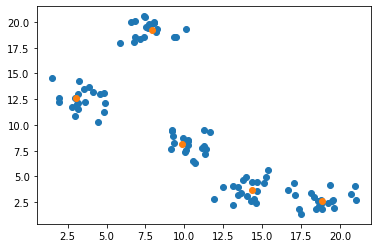

In [2]:
N_CLUSTERS, POINTS_PER_CLUSTER, CLUSTER_SPREAD, DIMENSION = 5, 20, 20, 2

cluster_centers = np.random.random((N_CLUSTERS, DIMENSION)) * CLUSTER_SPREAD
points = np.array([
    np.random.normal(cluster_center)
    for _ in range(POINTS_PER_CLUSTER)
    for cluster_center in cluster_centers
])

plt.scatter(points[:,0], points[:,1])
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])

### Run q-means clustering
Here, we're running the Q-Means algorithm on a cpu simulator (via the `qcware/cpu_simulator` backend)

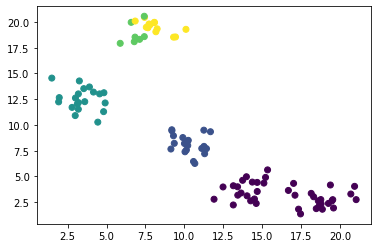

In [3]:
qmeans = QMeans(n_clusters=N_CLUSTERS)
qmeans.fit(points)
qlabels = qmeans.predict(points)

plt.scatter(points[:,0], points[:,1], c=qlabels)